In [1]:
import seaborn  # noqa
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler, Normalizer

In [2]:
num_vecs = 100000
# num_num_dims = 10
# dim_stride = 10
num_radii = 20
num_dims_list = [2, 4, 8, 18, 32, 64, 128]  # list(range(0, num_num_dims * dim_stride + 1, dim_stride))
rand_list = [np.random.rand, np.random.randn]
radii = np.array(list(range(1, num_radii + 1)))
radii = radii / len(radii)
counts = np.zeros((len(rand_list), len(radii), len(num_dims_list)))
for k, rand in enumerate(rand_list):
    for j, num_dims in enumerate(tqdm(num_dims_list)):
        x = rand(num_vecs, num_dims)
        # scaler = MinMaxScaler(feature_range=(-1, 1))
        # x = scaler.fit_transform(x)
        # normalizer = Normalizer()
        # x = normalizer.fit_transform(x)
        # equivalent to normalizer:
        x *= (1. / np.linalg.norm(x, axis=1)).reshape(-1, 1).dot(np.ones((1, x.shape[1]))) 
        for i, r in enumerate(radii):
            mask = (-r < x) & (x < r)
            counts[k, i, j] = (mask.sum(axis=1) == mask.shape[1]).sum()

100%|██████████| 7/7 [00:02<00:00,  3.32it/s]


### Explore High Dimesional Space

In [3]:
df = pd.DataFrame(counts[0], index=radii, columns=num_dims_list) / num_vecs
df = df.round(2)
df[df == 0] = ''
df

,2,4,8,18,32,64,128
0.05,,,,,,,
0.10,,,,,,,
0.15,,,,,,,0.37
0.20,,,,,,0.1,1
0.25,,,,,,1,1
0.30,,,,,0.55,1,1
0.35,,,,0.11,0.98,1,1
0.40,,,,0.62,1,1,1
0.45,,,0.03,0.92,1,1,1
0.50,,,0.2,0.99,1,1,1


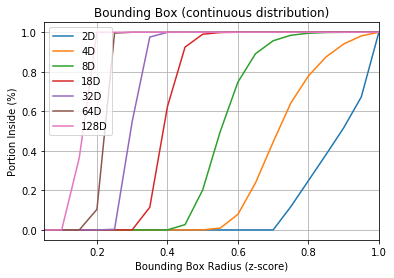

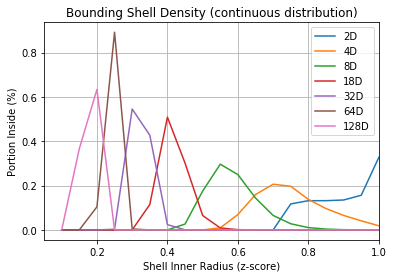

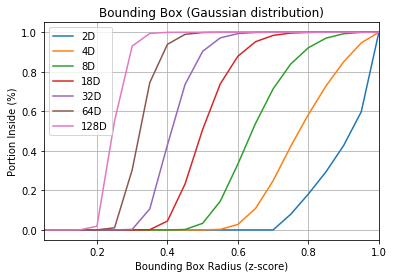

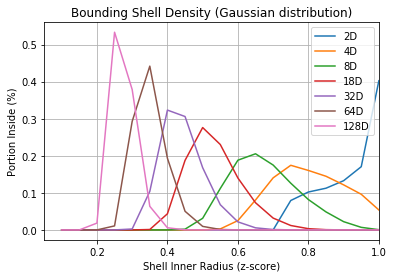

In [6]:
for k, rand in enumerate(rand_list):
    df = pd.DataFrame(counts[k], index=radii, columns=num_dims_list) / num_vecs
    fig1 = plt.figure(k * 2 + 1)
    plt.clf()
    ax1 = fig1.subplots()
    df.plot(ax=ax1)
    distribution = 'continuous' if rand.__name__ == 'rand' else 'Gaussian'
    plt.title('Bounding Box ({} distribution)'.format(distribution))
    plt.legend([str(d) + 'D' for d in num_dims_list])
    plt.xlabel('Bounding Box Radius (z-score)')
    plt.ylabel('Portion Inside (%)')
    plt.grid(True)

    fig2 = plt.figure(k * 2 + 2)
    plt.clf()
    ax2 = fig2.subplots()
    df.diff().plot(ax=ax2)
    plt.title('Bounding Shell Density ({} distribution)'.format(distribution))
    plt.legend([str(d) + 'D' for d in num_dims_list])
    plt.xlabel('Shell Inner Radius (z-score)')
    plt.ylabel('Portion Inside (%)')
    plt.grid(True)
plt.show(block=False)